In [ ]:
from google.colab import files
import pandas as pd

# Upload file (it will prompt you)
uploaded = files.upload()

# Load dataset (semicolon-separated)
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()


Saving bank-additional-full.csv to bank-additional-full.csv
Saving bank-additional-names.txt to bank-additional-names.txt


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Drop duration (not realistic predictor)
df = df.drop("duration", axis=1)

# Target: y (yes=1, no=0)
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Features and target
X = df.drop("y", axis=1)
y = df["y"]

# Check data
print(X.shape, y.value_counts())


(41188, 19) y
0    36548
1     4640
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Identify categorical and numeric columns
categorical = X.select_dtypes(include=["object"]).columns
numeric = X.select_dtypes(exclude=["object"]).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Build pipeline with Decision Tree
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Train model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔎 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9014323865015781

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.65      0.26      0.38      1392

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357


🔎 Confusion Matrix:
 [[10771   194]
 [ 1024   368]]


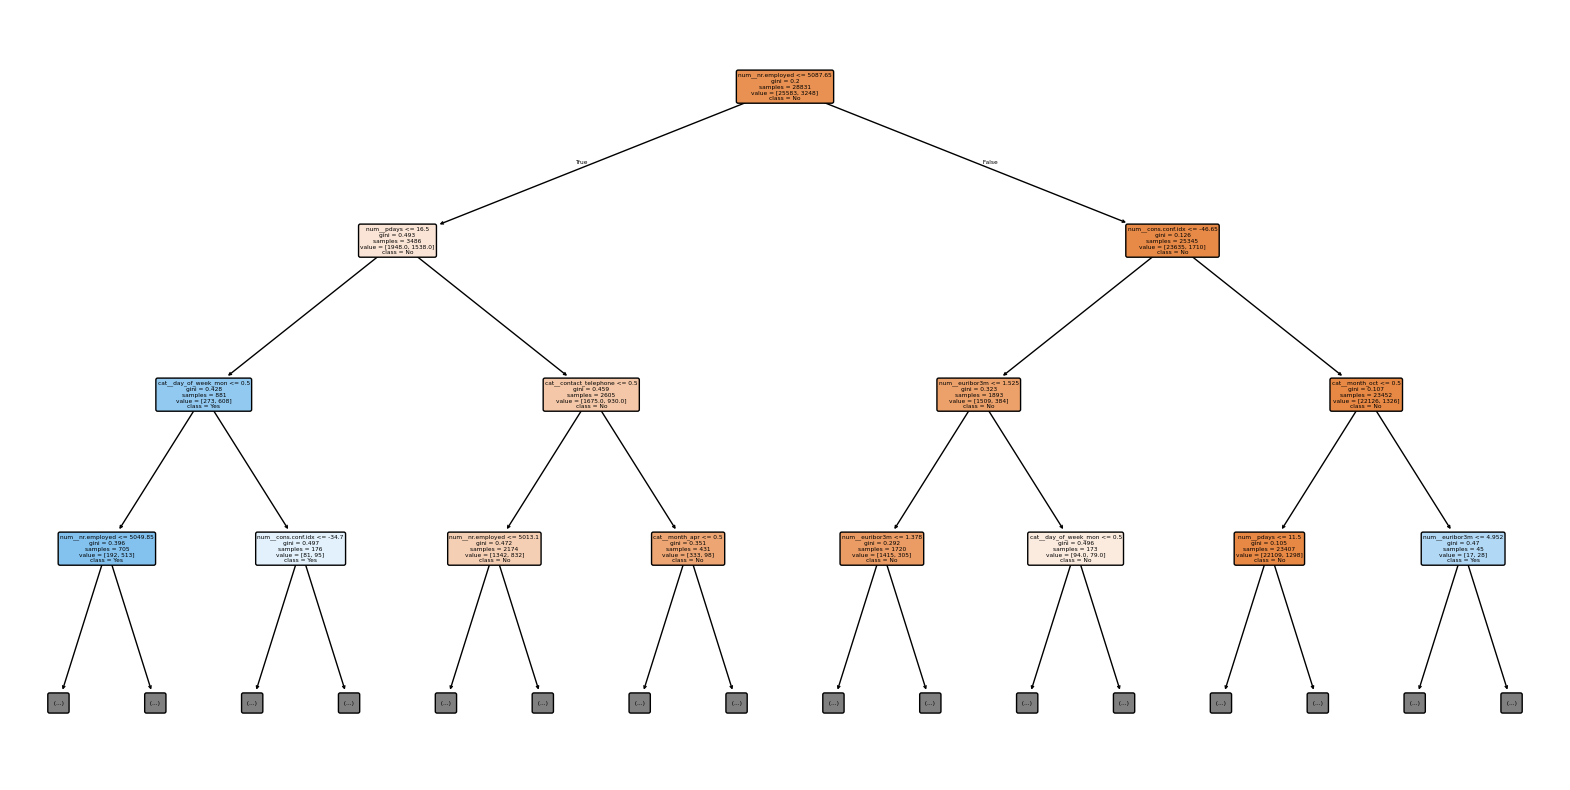

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract the trained decision tree
tree_model = clf.named_steps["classifier"]

# Feature names after encoding
feature_names = clf.named_steps["preprocessor"].get_feature_names_out()

plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    filled=True,
    feature_names=feature_names,
    class_names=["No", "Yes"],
    rounded=True,
    max_depth=3  # show top 3 levels for clarity
)
plt.show()


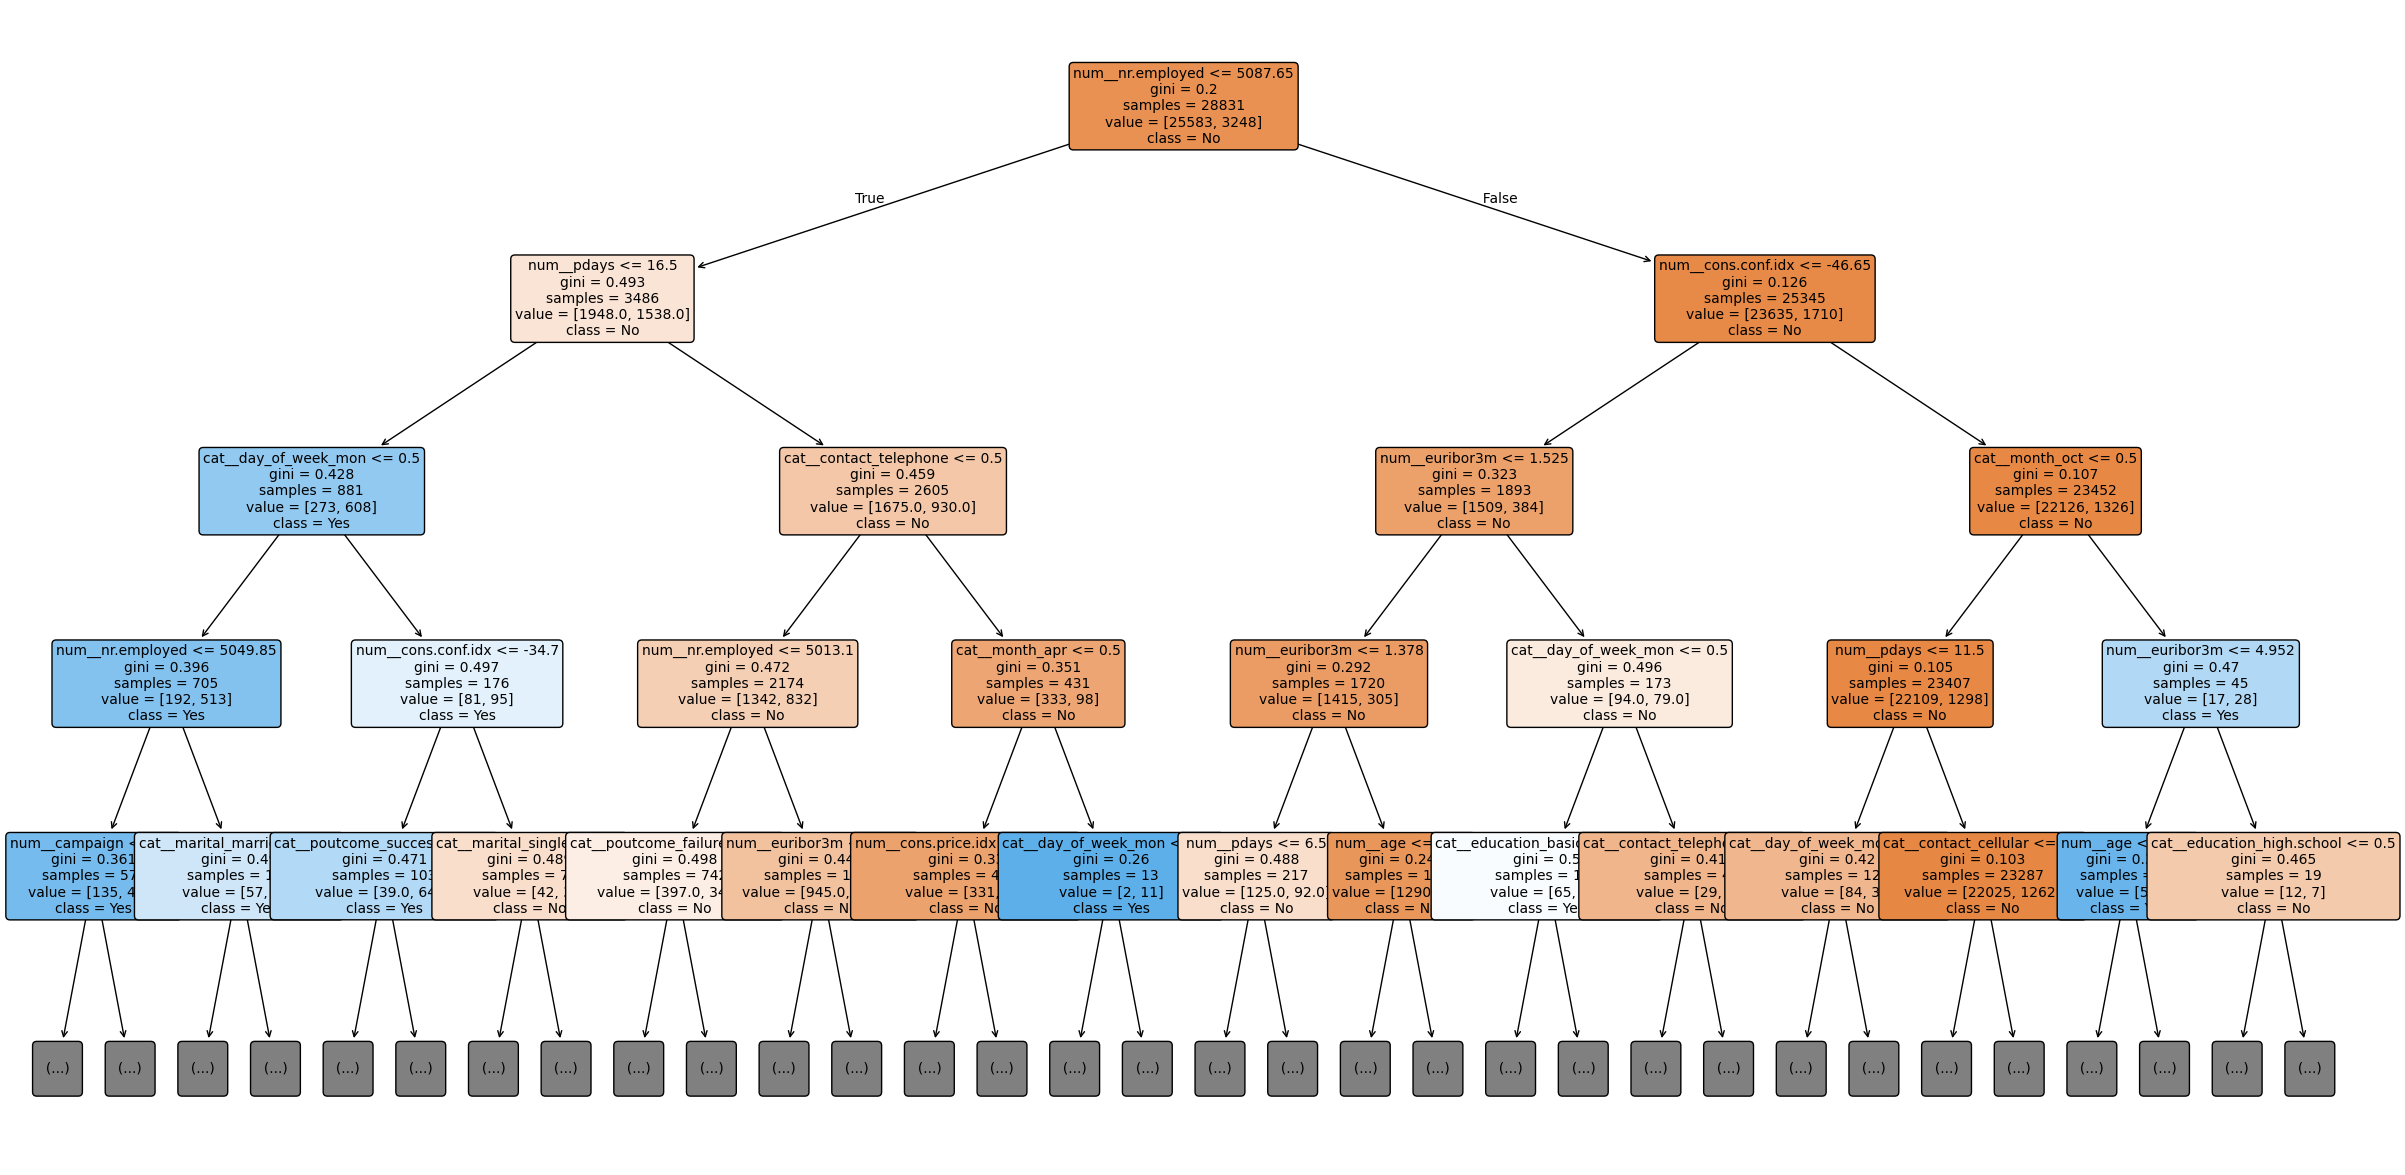

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get feature names after encoding
feature_names = clf.named_steps["preprocessor"].get_feature_names_out()

# Get the trained decision tree
tree_model = clf.named_steps["classifier"]

plt.figure(figsize=(30, 15))
plot_tree(
    tree_model,
    feature_names=feature_names,   # clear feature names
    class_names=["No", "Yes"],     # labels for target
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4   # limit depth for readability
)
plt.show()


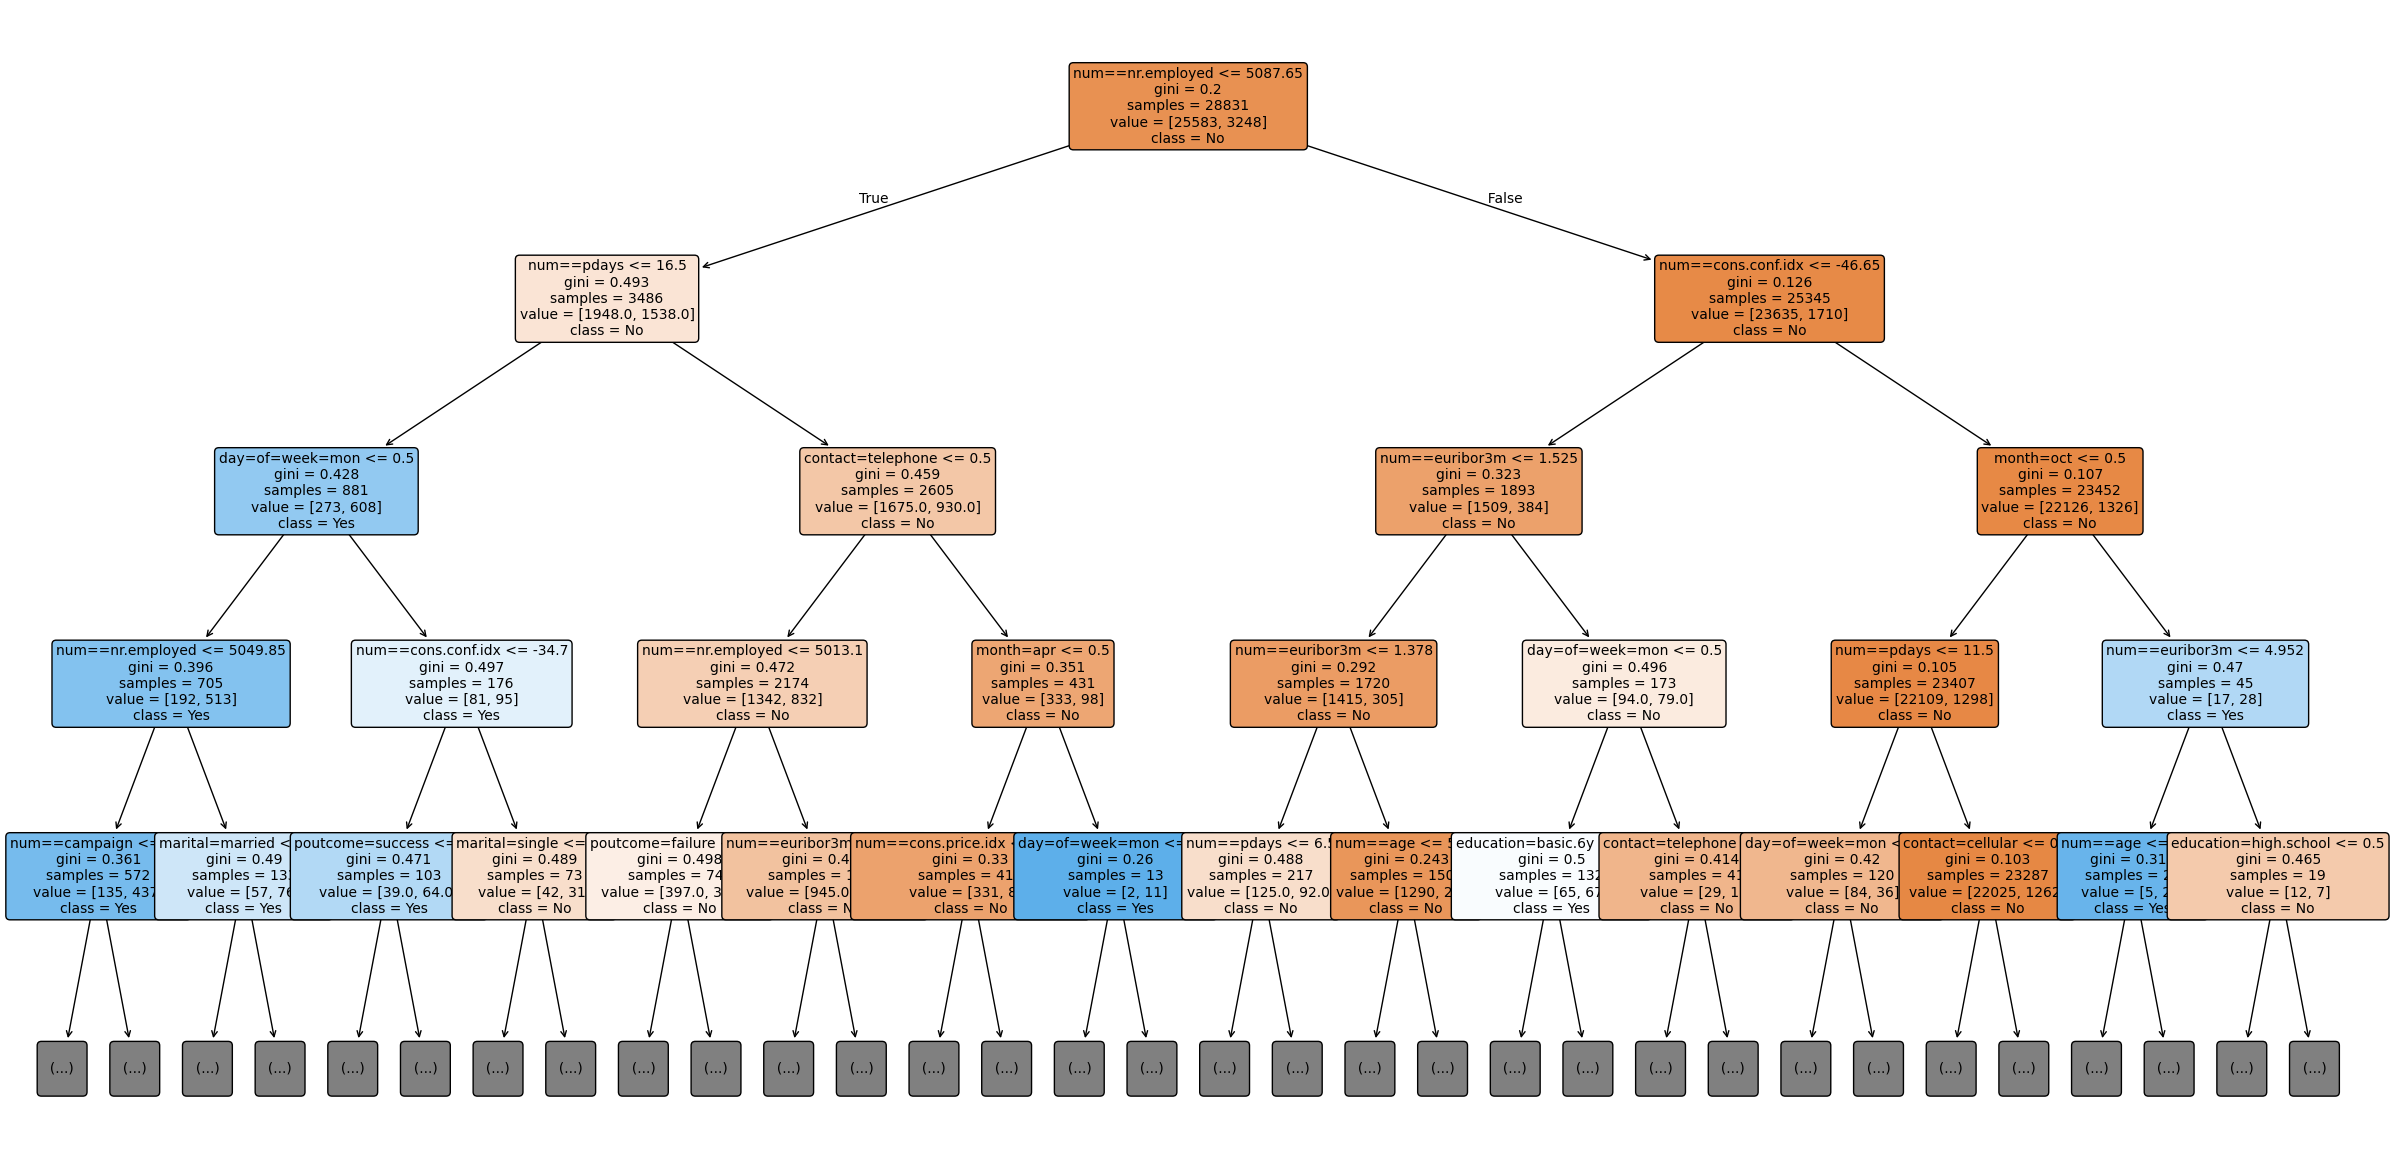

In [ ]:
# Clean feature names for readability
clean_names = [name.replace("cat__", "").replace("_", "=") for name in feature_names]

plt.figure(figsize=(30, 15))
plot_tree(
    tree_model,
    feature_names=clean_names,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4
)
plt.show()
